In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
# Specify the path to the file
df = pd.read_csv('Data\Fraudulent_E-Commerce_Transaction_Data.csv')
df2 = pd.read_csv('Data\Fraudulent_E-Commerce_Transaction_Data_2.csv')


# To use neural networks with the merged dataset in your code, you can follow these steps:

1. Data Preprocessing:

Ensure that your merged dataset (merged_df) is properly cleaned and preprocessed. This includes handling missing values, encoding categorical variables, and scaling numerical features if necessary.

In [3]:
#merging dataset
merged_df = pd.concat([df, df2], ignore_index=True)

# Print the contents of the file (panda's table formate)
merged_df

# Open the file and read its contents
#with open(file_path, 'r') as file:
#file_contents = file.read()

# Print the contents of the file
#print(file_contents)(if we does not want panda's table formate)

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496581,d8b7171f-bdd9-479c-b98b-396c621aebfe,98a3d94c-dc9a-4525-b273-e6ffe54cc5a4,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16
1496582,0fd12cf3-c641-4499-8de1-15dc4555cb0c,b3429f52-8b27-46b5-914c-4accd989edb4,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17
1496583,649680d3-a684-44cb-95bf-9b454c3aa86d,066e25c9-4420-4224-bc3f-1a462708090e,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23
1496584,c10dbb08-28fc-4ec1-9850-d4e98d2b9640,cde96e9c-f562-4b8c-8fa8-f356f474232b,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11


# Summary statistics for numerical features on fraudulent transection and non fraudulent transections

In [4]:
# Get counts for both fraudulent and non-fraudulent transactions with labels
fraud_counts_labeled = merged_df['Is Fraudulent'].value_counts().rename({0: 'Non-Fraudulent', 1: 'Fraudulent'})

# Print the counts with labels
print("Counts of Fraudulent and Non-Fraudulent Transactions:")
fraud_counts_labeled

Counts of Fraudulent and Non-Fraudulent Transactions:


Is Fraudulent
Non-Fraudulent    1421526
Fraudulent          75060
Name: count, dtype: int64

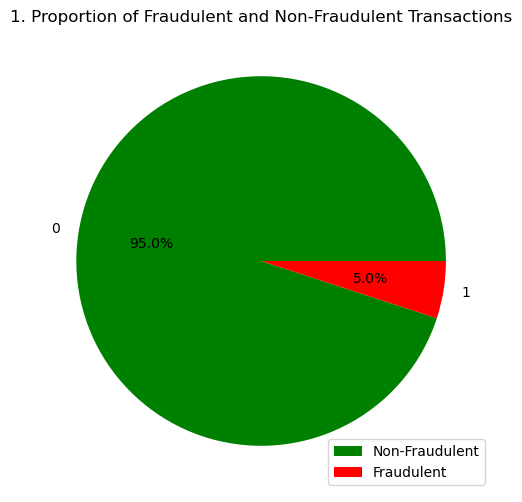

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of fraudulent and non-fraudulent transactions
fraud_counts = merged_df['Is Fraudulent'].value_counts()

# Create a dictionary to map numerical labels to strings
label_map = {0: 'Non-Fraudulent', 1: 'Fraudulent'}

# Plotting a pie chart with custom colors and annotations
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', colors=['green', 'red'])

# Add legends with replaced labels
legend_labels = [label_map[label] for label in fraud_counts.index]
plt.legend(legend_labels, loc="lower right")

plt.title('1. Proportion of Fraudulent and Non-Fraudulent Transactions', color='black')
plt.show()

1. Data Preprocessing For Device Analysis for non fraudulent transections

Split the dataset into input features (X) and the target variable (y), where 'Is Fraudulent' is target variable.
Where, Is Fraudulent: A binary indicator of whether the transaction is fraudulent (1 for fraudulent, 0 for legitimate).

In [6]:
# Filter the merged DataFrame for Non-fraudulent transactions
non_fraudulent_transactions = merged_df[merged_df['Is Fraudulent'] == 0]

# Sort the filtered DataFrame by 'Transaction Amount' in descending order
sorted_non_fraudulent_transactions = non_fraudulent_transactions.sort_values(by='Transaction Amount', ascending=False)

# Create a new DataFrame with selected columns
non_Fraud_columns_data = sorted_non_fraudulent_transactions[['Transaction ID', 'Transaction Amount', 'Device Used','Payment Method','Is Fraudulent']]

# Convert 'Transaction Amount' column to numeric
non_Fraud_columns_data = non_Fraud_columns_data.copy()
non_Fraud_columns_data['Transaction Amount'] = pd.to_numeric(non_Fraud_columns_data['Transaction Amount'], errors='coerce')

# Display the new DataFrame
non_Fraud_columns_data

,Transaction ID,Transaction Amount,Device Used,Payment Method,Is Fraudulent
1018165,08d979a0-f6b5-4cb9-b942-2e359e82eb2f,3570.78,tablet,credit card,0
1215770,5ba39554-0d18-44b5-bfb0-78841979d2b0,3277.75,desktop,debit card,0
830299,37b496c7-f7ee-4ae2-bde3-27166a2a26ed,2921.67,mobile,PayPal,0
1300282,d07bbd10-14f8-4fc2-b078-046d69278273,2803.66,tablet,PayPal,0
1177236,d0a3324b-b98c-420e-a56f-36216c8af520,2753.30,desktop,bank transfer,0
...,...,...,...,...,...
1453705,1a5b65e6-f770-41a4-8cea-c6d4982f9d58,10.00,tablet,PayPal,0
1473388,5c31a627-bef8-49a1-93dc-99a83d475cf7,10.00,mobile,PayPal,0
1209134,91e0393c-2a60-4c64-8215-5ec41c05456f,10.00,desktop,PayPal,0
1065614,fb5ca0d4-942b-494c-931b-f3843437d98e,10.00,mobile,credit card,0


1. Data Preprocessing For Device Analysis for fradulent transections

Split the dataset into input features (X) and the target variable (y), where 'Is Fraudulent' is target variable.
Where, Is Fraudulent: A binary indicator of whether the transaction is fraudulent (1 for fraudulent, 0 for legitimate).

In [7]:
# Filter the merged DataFrame for fraudulent transactions
fraudulent_transactions = merged_df[merged_df['Is Fraudulent'] == 1]

# Sort the filtered DataFrame by 'Transaction Amount' in descending order
sorted_fraudulent_transactions = fraudulent_transactions.sort_values(by='Transaction Amount', ascending=False)

# Create a new DataFrame with selected columns
Fraud_columns_data = sorted_fraudulent_transactions[['Transaction ID', 'Transaction Amount', 'Device Used','Payment Method','Is Fraudulent']]

# Display the new DataFrame
Fraud_columns_data

,Transaction ID,Transaction Amount,Device Used,Payment Method,Is Fraudulent
844823,a7c9414c-647c-457a-97f5-aa875bb39093,12701.75,mobile,credit card,1
551224,2ad1bb33-473a-4881-b14d-8471991114cb,9990.90,mobile,debit card,1
1486692,6e97ba1f-2013-4c6e-a57c-d868c20ef291,9716.50,tablet,bank transfer,1
731174,091061e5-646f-4f55-b978-8fdfa1375eb9,9221.60,desktop,credit card,1
465849,f79f60c3-f788-486a-9ea0-5f1f43c99df6,8603.95,mobile,debit card,1
...,...,...,...,...,...
1032442,4285c6b5-59b3-4817-a171-688dec57c3d4,10.02,tablet,credit card,1
1182361,3a13b52e-97de-4b92-a23a-6a03014c3500,10.02,desktop,bank transfer,1
506135,efd58fe4-e2b6-4cb5-aa64-7556fd062004,10.01,desktop,credit card,1
1417307,f925284b-7352-44db-98bd-a3aa97662ced,10.01,desktop,bank transfer,1


# Descriptive Statistics:

Calculated summary statistics for numerical features such as mean, median, minimum, maximum, standard deviation, and quartiles. 

Used the describe() method in pandas to get a quick overview of these statistics.
For categorical features, calculated frequency counts and proportions for each category.

In [8]:
# Set the display format for pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Descriptive statistics on 'Transaction Amount' for non-fraudulent transactions
transaction_amount_stats_non_fraudulent = non_Fraud_columns_data['Transaction Amount'].describe()

# Count the number of rows in the DataFrame
row_count_non_fraudulent = non_Fraud_columns_data.shape[0]

# Display the descriptive statistics with title and row count
print("Descriptive Statistics for Transaction Amount - Non-Fraudulent Transactions ({} rows):\n".format(row_count_non_fraudulent))
print(transaction_amount_stats_non_fraudulent)

print("\n-------------------------------------------\n")

# Descriptive statistics on 'Transaction Amount' for fraudulent transactions
transaction_amount_stats_fraudulent = Fraud_columns_data['Transaction Amount'].describe()

# Display the descriptive statistics
print("Descriptive Statistics for Transaction Amount - Fraudulent Transactions:\n")
print(transaction_amount_stats_fraudulent)

Descriptive Statistics for Transaction Amount - Non-Fraudulent Transactions (1421526 rows):

count   1421526.00
mean        209.85
std         199.93
min          10.00
25%          67.35
50%         148.51
75%         287.10
max        3570.78
Name: Transaction Amount, dtype: float64

-------------------------------------------

Descriptive Statistics for Transaction Amount - Fraudulent Transactions:

count   75060.00
mean      548.05
std       770.81
min        10.00
25%       106.30
50%       256.07
75%       634.78
max     12701.75
Name: Transaction Amount, dtype: float64


In [25]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Descriptive statistics on 'Transaction Amount' for non-fraudulent transactions
transaction_amount_stats_non_fraudulent = non_Fraud_columns_data['Transaction Amount'].describe()

# Count the number of rows in the non-fraudulent DataFrame
row_count_non_fraudulent = non_Fraud_columns_data.shape[0]

# Calculate variance for non-fraudulent transactions
variance_non_fraudulent = non_Fraud_columns_data['Transaction Amount'].var()


print("Descriptive Statistics for Transaction Amount - Non-Fraudulent Transactions ({} rows):\n".format(row_count_non_fraudulent))
print(transaction_amount_stats_non_fraudulent)
# Display the variance
print("Variance for Transaction Amount - Non-Fraudulent Transactions: {:.2f}".format(variance_non_fraudulent))

# Descriptive statistics on 'Transaction Amount' for fraudulent transactions
transaction_amount_stats_fraudulent = Fraud_columns_data['Transaction Amount'].describe()



# Display the descriptive statistics for fraudulent transactions
print("\n-------------------------------------------\n")
print("Descriptive Statistics for Transaction Amount - Fraudulent Transactions:\n")

#Calculate variance for fraudulent transactions
variance_fraudulent = Fraud_columns_data['Transaction Amount'].var()

# Display the variance
print(transaction_amount_stats_fraudulent)
print("Variance for Transaction Amount - Fraudulent Transactions: {:.2f}".format(variance_fraudulent))


Descriptive Statistics for Transaction Amount - Non-Fraudulent Transactions (1421526 rows):

count   1421526.00
mean        209.85
std         199.93
min          10.00
25%          67.35
50%         148.51
75%         287.10
max        3570.78
Name: Transaction Amount, dtype: float64
Variance for Transaction Amount - Non-Fraudulent Transactions: 39972.15

-------------------------------------------

Descriptive Statistics for Transaction Amount - Fraudulent Transactions:

count   75060.00
mean      548.05
std       770.81
min        10.00
25%       106.30
50%       256.07
75%       634.78
max     12701.75
Name: Transaction Amount, dtype: float64
Variance for Transaction Amount - Fraudulent Transactions: 594151.25


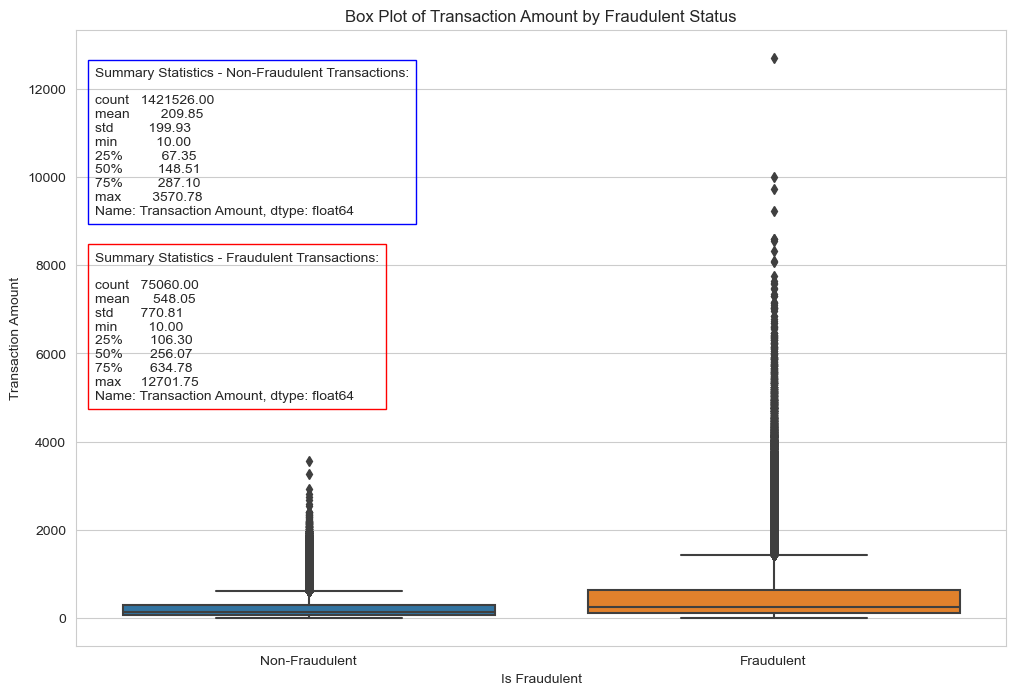

In [34]:
# Create a box plot for transaction amounts grouped by 'Is Fraudulent'
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Is Fraudulent', y='Transaction Amount', data=pd.concat([non_Fraud_columns_data, Fraud_columns_data]))
plt.title("Box Plot of Transaction Amount by Fraudulent Status")
plt.xlabel("Is Fraudulent")
plt.ylabel("Transaction Amount")
plt.xticks(ticks=[0, 1], labels=["Non-Fraudulent", "Fraudulent"])


# Add summary statistics table for Non-Fraudulent transactions
non_fraud_stats = non_Fraud_columns_data['Transaction Amount'].describe()
fraud_stats = Fraud_columns_data['Transaction Amount'].describe()

# Define the position for the summary statistics table
table_x = 0.02
table_y = 0.7

# Add summary statistics for Non-Fraudulent transactions
ax.text(table_x, table_y, "Summary Statistics - Non-Fraudulent Transactions:\n\n" + str(non_fraud_stats), fontsize=10, transform=ax.transAxes, bbox=dict(facecolor='none', edgecolor='blue', pad=5.0))

# Add summary statistics for Fraudulent transactions
ax.text(table_x, table_y - 0.3, "Summary Statistics - Fraudulent Transactions:\n\n" + str(fraud_stats), fontsize=10, transform=ax.transAxes, bbox=dict(facecolor='none', edgecolor='red', pad=5.0))

plt.show()

# Frequency Counts for Payment Method - Fraudulent Transactions and non Fraudulent transection as per Payment methods

In [41]:
# Frequency Counts for Payment Method - Fraudulent Transactions
payment_method_counts_fraudulent = Fraud_columns_data['Payment Method'].value_counts()

# Display the frequency counts for fraudulent transactions
print("Frequency Counts for Payment Method - Fraudulent Transactions:\n")
print(payment_method_counts_fraudulent)

# Frequency Counts for Payment Method - Non-Fraudulent Transactions
payment_method_counts_non_fraudulent = non_Fraud_columns_data['Payment Method'].value_counts()

# Display the frequency counts for non-fraudulent transactions
print("\n-------------------------------------------\n")
print("Frequency Counts for Payment Method - Non-Fraudulent Transactions:\n")
print(payment_method_counts_non_fraudulent)

Frequency Counts for Payment Method - Fraudulent Transactions:

Payment Method
bank transfer    18886
PayPal           18787
debit card       18773
credit card      18614
Name: count, dtype: int64

-------------------------------------------

Frequency Counts for Payment Method - Non-Fraudulent Transactions:

Payment Method
credit card      355738
debit card       355456
bank transfer    355252
PayPal           355080
Name: count, dtype: int64


Total Transection Amount As per Payment Method - Fraudulent Transactions

In [55]:
# Group the fraudulent transactions by 'Payment Method' 
grouped_transactions = Fraud_columns_data.groupby('Payment Method')

# Calculate the sum of transaction amounts and count of transaction IDs for each payment method
summary = grouped_transactions.agg({'Transaction Amount': 'sum', 'Transaction ID': 'count'}).reset_index()

# Rename columns for clarity
summary.rename(columns={'Transaction ID': 'Transaction Count', 'Transaction Amount': 'Total Transaction Amount'}, inplace=True)

# Sort the summary data from highest to lowest based on the total transaction amount
summary_sorted = summary.sort_values(by='Total Transaction Amount', ascending=False)

print("Toal transection amount for Payment Method - Fraudulent Transactions:\n")

# Display the sorted summary
summary_sorted



Toal transection amount for Payment Method - Fraudulent Transactions:



,Payment Method,Total Transaction Amount,Transaction Count
1,bank transfer,10316261.66,18886
0,PayPal,10297530.64,18787
3,debit card,10278258.64,18773
2,credit card,10244761.36,18614


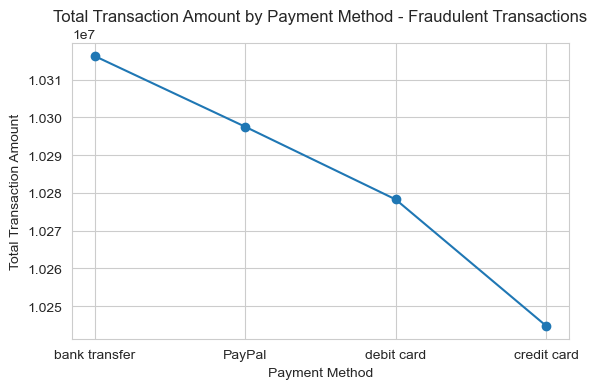

In [69]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the line chart
plt.plot(summary_sorted['Payment Method'], summary_sorted['Total Transaction Amount'], marker='o')

# Add labels and title
plt.title('Total Transaction Amount by Payment Method - Fraudulent Transactions')
plt.xlabel('Payment Method')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=0)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

Total Transection Amount As per Payment Method - Non-Fraudulent Transactions

In [56]:

# Group the fraudulent transactions by 'Payment Method' 
non_grouped_transactions = non_Fraud_columns_data.groupby('Payment Method')

# Calculate the sum of transaction amounts and count of transaction IDs for each payment method
non_summary = non_grouped_transactions.agg({'Transaction Amount': 'sum', 'Transaction ID': 'count'}).reset_index()

# Rename columns for clarity
non_summary.rename(columns={'Transaction ID': 'Transaction Count', 'Transaction Amount': 'Total Transaction Amount'}, inplace=True)

# Sort the summary data from highest to lowest based on the total transaction amount
non_summary_sorted = non_summary.sort_values(by='Total Transaction Amount', ascending=False)

print("Toal transection amount for Payment Method - Non-Fraudulent Transactions:\n")

# Display the sorted summary
non_summary_sorted

Toal transection amount for Payment Method - Non-Fraudulent Transactions:



,Payment Method,Total Transaction Amount,Transaction Count
2,credit card,74763439.43,355738
3,debit card,74627618.13,355456
1,bank transfer,74506433.11,355252
0,PayPal,74405393.67,355080


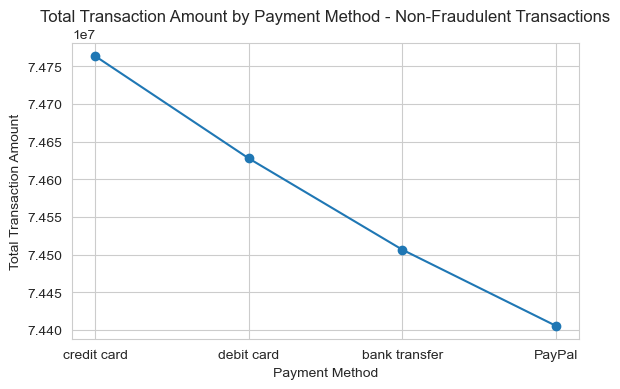

In [68]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the line chart
plt.plot(non_summary_sorted['Payment Method'], non_summary_sorted['Total Transaction Amount'], marker='o')

# Add labels and title
plt.title('Total Transaction Amount by Payment Method - Non-Fraudulent Transactions')
plt.xlabel('Payment Method')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=0)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Counts for device used - Fraudulent Transactions and non Fraudulent transections

In [ ]:
import pandas as pd

# Assuming Fraud_columns_data contains your DataFrame

# Filter the merged DataFrame for credit card transactions
credit_card_transactions = Fraud_columns_data[Fraud_columns_data['Payment Method'] == 'credit card']

# Group the credit card transactions by 'Device Used' subcategory
grouped_transactions = credit_card_transactions.groupby('Device Used')

# Calculate the sum and count of transactions for each device used
summary = grouped_transactions.agg({'Transaction Amount': 'sum', 'Transaction ID': 'count'}).reset_index()

# Rename columns for clarity
summary.rename(columns={'Transaction ID': 'Transaction Count', 'Transaction Amount': 'Total Transaction Amount'}, inplace=True)

# Sort the summary data from highest to lowest based on the total transaction amount
summary_sorted = summary.sort_values(by='Total Transaction Amount', ascending=False)

# Display the summary
summary_sorted

,Device Used,Total Transaction Amount,Transaction Count
1,mobile,3482067.66,6286
0,desktop,3381980.20,6124
2,tablet,3380713.50,6204


In [ ]:
# Group the fraudulent transactions by 'Device Used'
grouped_transactions = Fraud_columns_data.groupby('Device Used')

# Calculate the sum of transaction amounts and count of transaction IDs for each device used
summary = grouped_transactions.agg({'Transaction Amount': 'sum', 'Transaction ID': 'count'}).reset_index()

# Rename columns for clarity
summary.rename(columns={'Transaction ID': 'Transaction Count', 'Transaction Amount': 'Total Transaction Amount'}, inplace=True)

# Sort the summary data from highest to lowest based on the total transaction amount
summary_sorted = summary.sort_values(by='Total Transaction Amount', ascending=False)

# Display the sorted summary
summary_sorted

,Device Used,Total Transaction Amount,Transaction Count
1,mobile,13932474.53,25296
0,desktop,13669239.13,24853
2,tablet,13535098.64,24911


In [ ]:
# Group the fraudulent transactions by 'Payment Method' and 'Device Used'
grouped_transactions = Fraud_columns_data.groupby(['Payment Method', 'Device Used'])

# Calculate the sum of transaction amounts and count of transaction IDs for each payment method and device used
summary = grouped_transactions.agg({'Transaction Amount': 'sum', 'Transaction ID': 'count'}).reset_index()

# Sort the summary data within each payment method group from highest to lowest based on both transaction count and total transaction amount
summary_sorted = summary.groupby('Payment Method').apply(lambda x: x.sort_values(by=['Transaction ID', 'Transaction Amount'], ascending=False))

# Reset index after sorting
summary_sorted.reset_index(drop=True, inplace=True)

# Define a function to retrieve top N rows for each group
def get_top_n_rows(group, n=3):
    return group.head(n)

# Apply the function to get the top 3 device used subcategories for each payment method
top_3_device_used = summary_sorted.groupby('Payment Method').apply(get_top_n_rows)

# Display the result
top_3_device_used

Payment Method Device Used  Transaction Amount  \
Payment Method                                                     
PayPal         0          PayPal      mobile          3572944.12   
               1          PayPal     desktop          3436016.32   
               2          PayPal      tablet          3288570.20   
bank transfer  3   bank transfer     desktop          3488130.09   
               4   bank transfer      tablet          3439134.03   
               5   bank transfer      mobile          3388997.54   
credit card    6     credit card      mobile          3482067.66   
               7     credit card      tablet          3380713.50   
               8     credit card     desktop          3381980.20   
debit card     9      debit card      mobile          3488465.21   
               10     debit card      tablet          3426680.91   
               11     debit card     desktop          3363112.52   

                   Transaction ID  
Payment Method                     
PayPal         0             6385  
               1             6292  
               2             6110  
bank transfer  3             6338  
               4             6312  
               5             6236  
credit card    6             6286  
               7             6204  
               8             6124  
debit card     9             6389  
               10            6285  
               11            6099